In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import local_config

df = pd.read_csv(f'{local_config.DATA_DIR}/angle_testing/all_simulations_wrongxy.csv')

targ = 'x'

plt.scatter(df[f"Strain Rate {targ}"], df[f"Sigma_{targ}"], alpha=0.1, s=10)
plt.xlabel(f"Strain Rate {targ}")
plt.ylabel(f"Sigma {targ}")
plt.title(f"Strain vs stress ({targ})")
plt.show()


DP Parameters in $(\alpha, k)$ space

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("drucker_prager_params.csv")

plt.figure(figsize=(8, 8))

plt.scatter(df["alpha"], df["k"], color='black', s=20, alpha=0.2)
plt.xlabel(r"$\alpha$", fontsize=18)
plt.ylabel(r"$k$", fontsize=18)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Fit Drucker-Prager parameters for 1000 samples", fontsize=20)
plt.tight_layout()


DP Parameters in $\sigma_{ts}, \sigma_{cs}$ space

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("drucker_prager_params.csv")

plt.figure(figsize=(8, 8))

cs = (3 * df["k"]) / (np.sqrt(3) - 3 * df["alpha"])
ts = (3 * df["k"]) / (np.sqrt(3) + 3 * df["alpha"])
bs = (3 * df["k"]) / (np.sqrt(3) + 6 * df["alpha"])


plt.scatter(ts, cs, color='red', s=20, alpha=0.2, label='Compressive')
plt.scatter(ts, bs, color='blue', s=20, alpha=0.2, label='Biaxial Tensile')
plt.xlabel(r"Uniaxial Tensile Strength (GPa)", fontsize=18)
plt.ylabel(r"Compressive or Biaxial Tensile Strength(GPa)", fontsize=18)

plt.xlim(20, 130)
plt.ylim(20, 130)

plt.legend(fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Uniaxial Tensile, Compressive, and Biaxial Tensile Strengths", fontsize=20)
plt.tight_layout()

Probing the DP Parameter constraints

/tmp/ipykernel_799747/2048958762.py:16: RuntimeWarning: divide by zero encountered in divide
  alpha = (CS - ts) / (np.sqrt(3) * (CS + ts))
/tmp/ipykernel_799747/2048958762.py:17: RuntimeWarning: divide by zero encountered in divide
  k = (2 * CS * ts) / (np.sqrt(3) * (CS + ts))
/tmp/ipykernel_799747/2048958762.py:128: RuntimeWarning: divide by zero encountered in divide
  alpha = (ts) / (np.sqrt(3) * (3 * CS - ts))
/tmp/ipykernel_799747/2048958762.py:129: RuntimeWarning: divide by zero encountered in divide
  k = (np.sqrt(3) * CS * ts) / (3 * CS - ts)


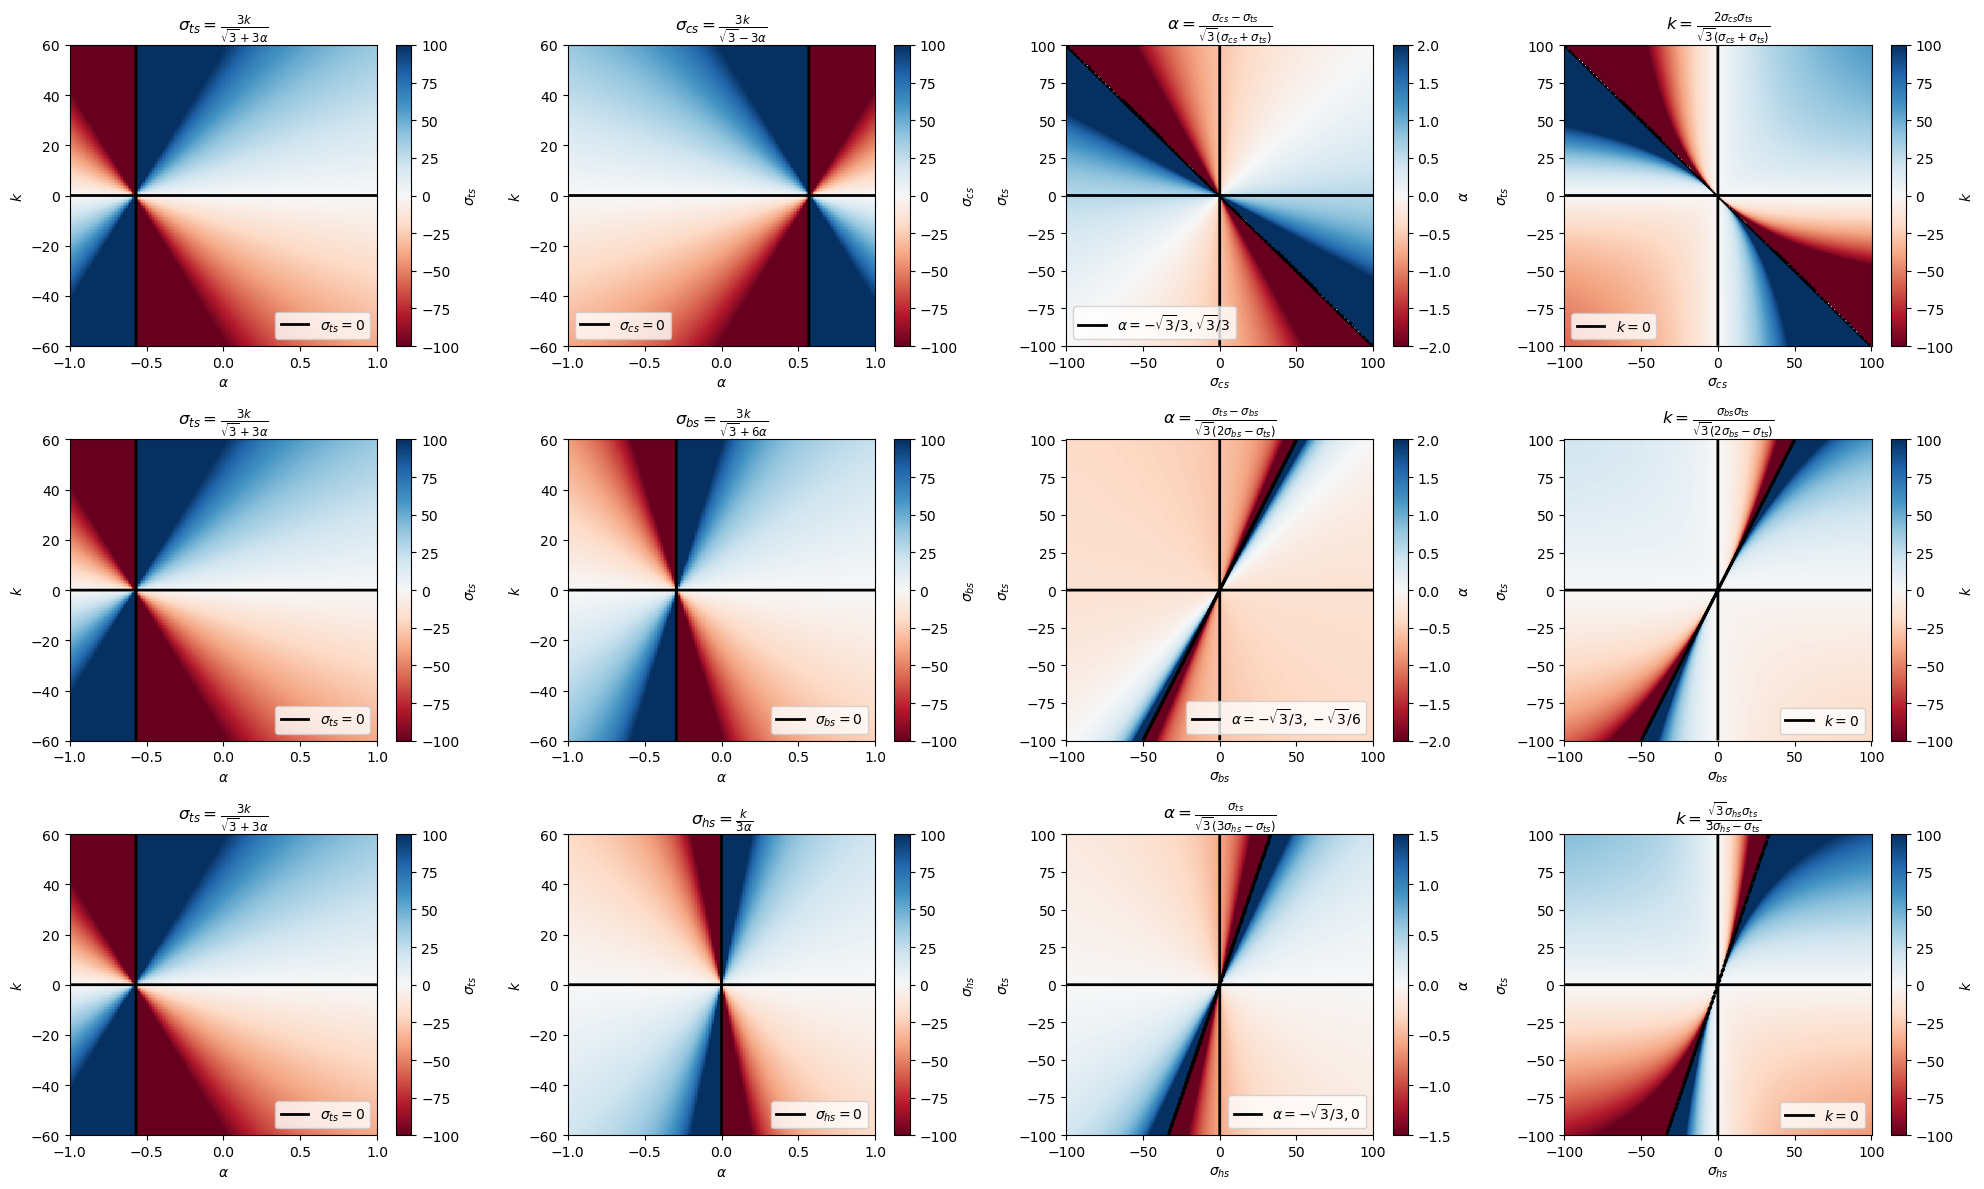

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


proxy = Line2D([0], [0], color='k', lw=2)

# Define ranges for σ_cs and σ_ts
sigma_cs = np.linspace(-100, 100, 500)
sigma_ts = np.linspace(-100, 100, 500)

# Create meshgrid
CS, ts = np.meshgrid(sigma_cs, sigma_ts)

# Compute alpha
alpha = (CS - ts) / (np.sqrt(3) * (CS + ts))
k = (2 * CS * ts) / (np.sqrt(3) * (CS + ts))

# Plot
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 12))

c02 = axs[0, 2].pcolormesh(CS, ts, alpha, shading='auto', cmap='RdBu', vmin=-2, vmax=2)
fig.colorbar(c02, ax=axs[0, 2], label=r'$\alpha$')

axs[0, 2].set_xlabel(r'$\sigma_{cs}$')
axs[0, 2].set_ylabel(r'$\sigma_{ts}$')
axs[0, 2].set_title(r'$\alpha = \frac{\sigma_{cs} - \sigma_{ts}}{\sqrt{3} (\sigma_{cs} + \sigma_{ts})}$')
axs[0, 2].contour(CS, ts, alpha, levels=[np.sqrt(3)/3], colors=['k'], linewidths=2)
axs[0, 2].contour(CS, ts, alpha, levels=[-np.sqrt(3)/3], colors=['k'], linewidths=2)
axs[0, 2].legend([proxy], [r'$\alpha = -\sqrt{3}/3, \sqrt{3}/3$'], loc='lower left')

c03 = axs[0, 3].pcolormesh(CS, ts, k, shading='auto', cmap='RdBu', vmin=-100, vmax=100)
fig.colorbar(c03, ax=axs[0, 3], label=r'$k$')

axs[0, 3].set_xlabel(r'$\sigma_{cs}$')
axs[0, 3].set_ylabel(r'$\sigma_{ts}$')
axs[0, 3].set_title(r'$k = \frac{2 \sigma_{cs} \sigma_{ts}}{\sqrt{3} (\sigma_{cs} + \sigma_{ts})}$')
axs[0, 3].contour(CS, ts, k, levels=[0], colors=['k'], linewidths=2)
axs[0, 3].legend([proxy], [r'$k = 0$'], loc='lower left')

amin = -1
amax = 1
kmin = -60
kmax = 60

alphs = np.linspace(amin, amax, 200)
ks = np.linspace(kmin, kmax, 200)

AS, KS = np.meshgrid(alphs, ks)

sig_cs = (3 * KS) / (np.sqrt(3) - 3 * AS)
sig_ts = (3 * KS) / (np.sqrt(3) + 3 * AS)

axs[0, 0].set_xlabel(r'$\alpha$')
axs[0, 0].set_ylabel(r'$k$')
axs[0, 0].set_title(r'$\sigma_{ts} = \frac{3k}{\sqrt{3} + 3\alpha}$')
axs[0, 0].set_xlim(amin, amax)
axs[0, 0].set_ylim(kmin, kmax)

c00 = axs[0, 0].pcolormesh(AS, KS, sig_ts, shading='auto', cmap='RdBu', vmin=-100, vmax=100)
fig.colorbar(c00, ax=axs[0, 0], label=r'$\sigma_{ts}$')
axs[0, 0].contour(AS, KS, sig_ts, levels=[0], colors=['k'], linewidths=2)
axs[0, 0].legend([proxy], [r'$\sigma_{ts} = 0$'], loc='lower right')

axs[0, 1].set_xlabel(r'$\alpha$')
axs[0, 1].set_ylabel(r'$k$')
axs[0, 1].set_title(r'$\sigma_{cs} = \frac{3k}{\sqrt{3} - 3\alpha}$')
axs[0, 1].set_xlim(amin, amax)
axs[0, 1].set_ylim(kmin, kmax)

c01 = axs[0, 1].pcolormesh(AS, KS, sig_cs, shading='auto', cmap='RdBu', vmin=-100, vmax=100)
fig.colorbar(c01, ax=axs[0, 1], label=r'$\sigma_{cs}$')
axs[0, 1].contour(AS, KS, sig_cs, levels=[0], colors=['k'], linewidths=2)
axs[0, 1].legend([proxy], [r'$\sigma_{cs} = 0$'], loc='lower left')



# Now do this for bs and ts (cs turns into bs here)
alpha = (ts - CS) / (np.sqrt(3) * (2*CS - ts))
k = (CS * ts) / (np.sqrt(3) * (2*CS - ts))

c12 = axs[1, 2].pcolormesh(CS, ts, alpha, shading='auto', cmap='RdBu', vmin=-2, vmax=2)
fig.colorbar(c12, ax=axs[1, 2], label=r'$\alpha$')

axs[1, 2].set_xlabel(r'$\sigma_{bs}$')
axs[1, 2].set_ylabel(r'$\sigma_{ts}$')
axs[1, 2].set_title(r'$\alpha = \frac{\sigma_{ts}-\sigma_{bs}}{\sqrt{3}(2\sigma_{bs}-\sigma_{ts})}$')
axs[1, 2].contour(CS, ts, alpha, levels=[-np.sqrt(3)/3], colors=['k'], linewidths=2, linestyles='solid')
axs[1, 2].contour(CS, ts, alpha, levels=[-np.sqrt(3)/6], colors=['k'], linewidths=2, linestyles='solid')
axs[1, 2].legend([proxy], [r'$\alpha = -\sqrt{3}/3, -\sqrt{3}/6$'], loc='lower right')

c13 = axs[1, 3].pcolormesh(CS, ts, k, shading='auto', cmap='RdBu', vmin=-100, vmax=100)
fig.colorbar(c13, ax=axs[1, 3], label=r'$k$')

axs[1, 3].set_xlabel(r'$\sigma_{bs}$')
axs[1, 3].set_ylabel(r'$\sigma_{ts}$')
axs[1, 3].set_title(r'$k = \frac{\sigma_{bs}\sigma_{ts}}{\sqrt{3}(2\sigma_{bs}-\sigma_{ts})}$')
axs[1, 3].contour(CS, ts, k, levels=[0], colors=['k'], linewidths=2)
axs[1, 3].legend([proxy], [r'$k = 0$'], loc='lower right')

sig_bs = (3 * KS) / (np.sqrt(3) + 6 * AS)
sig_ts = (3 * KS) / (np.sqrt(3) + 3 * AS)

axs[1, 0].set_xlabel(r'$\alpha$')
axs[1, 0].set_ylabel(r'$k$')
axs[1, 0].set_title(r'$\sigma_{ts} = \frac{3k}{\sqrt{3} + 3\alpha}$')
axs[1, 0].set_xlim(amin, amax)
axs[1, 0].set_ylim(kmin, kmax)

c10 = axs[1, 0].pcolormesh(AS, KS, sig_ts, shading='auto', cmap='RdBu', vmin=-100, vmax=100)
fig.colorbar(c10, ax=axs[1, 0], label=r'$\sigma_{ts}$')
axs[1, 0].contour(AS, KS, sig_ts, levels=[0], colors=['k'], linewidths=2)
axs[1, 0].legend([proxy], [r'$\sigma_{ts} = 0$'], loc='lower right')

axs[1, 1].set_xlabel(r'$\alpha$')
axs[1, 1].set_ylabel(r'$k$')
axs[1, 1].set_title(r'$\sigma_{bs} = \frac{3k}{\sqrt{3} + 6\alpha}$')
axs[1, 1].set_xlim(amin, amax)
axs[1, 1].set_ylim(kmin, kmax)

c11 = axs[1, 1].pcolormesh(AS, KS, sig_bs, shading='auto', cmap='RdBu', vmin=-100, vmax=100)
fig.colorbar(c11, ax=axs[1, 1], label=r'$\sigma_{bs}$')
axs[1, 1].contour(AS, KS, sig_bs, levels=[0], colors=['k'], linewidths=2)
axs[1, 1].legend([proxy], [r'$\sigma_{bs} = 0$'], loc='lower right')


# Now do this for hs and ts (cs turns into hs here)
alpha = (ts) / (np.sqrt(3) * (3 * CS - ts))
k = (np.sqrt(3) * CS * ts) / (3 * CS - ts)

c22 = axs[2, 2].pcolormesh(CS, ts, alpha, shading='auto', cmap='RdBu', vmin=-1.5, vmax=1.5)
fig.colorbar(c22, ax=axs[2, 2], label=r'$\alpha$')

axs[2, 2].set_xlabel(r'$\sigma_{hs}$')
axs[2, 2].set_ylabel(r'$\sigma_{ts}$')
axs[2, 2].set_title(r'$\alpha = \frac{\sigma_{ts}}{\sqrt{3}(3\sigma_{hs}-\sigma_{ts})}$')
axs[2, 2].contour(CS, ts, alpha, levels=[-np.sqrt(3)/3], colors=['k'], linewidths=2, linestyles='solid')
axs[2, 2].contour(CS, ts, alpha, levels=[0], colors=['k'], linewidths=2, linestyles='solid')
axs[2, 2].legend([proxy], [r'$\alpha = -\sqrt{3}/3, 0$'], loc='lower right')

c23 = axs[2, 3].pcolormesh(CS, ts, k, shading='auto', cmap='RdBu', vmin=-100, vmax=100)
fig.colorbar(c23, ax=axs[2, 3], label=r'$k$')

axs[2, 3].set_xlabel(r'$\sigma_{hs}$')
axs[2, 3].set_ylabel(r'$\sigma_{ts}$')
axs[2, 3].set_title(r'$k = \frac{\sqrt{3}\sigma_{hs}\sigma_{ts}}{3\sigma_{hs}-\sigma_{ts}}$')
axs[2, 3].contour(CS, ts, k, levels=[0], colors=['k'], linewidths=2)
axs[2, 3].legend([proxy], [r'$k = 0$'], loc='lower right')

sig_hs = (KS) / (3 * AS)
sig_ts = (3 * KS) / (np.sqrt(3) + 3 * AS)

axs[2, 0].set_xlabel(r'$\alpha$')
axs[2, 0].set_ylabel(r'$k$')
axs[2, 0].set_title(r'$\sigma_{ts} = \frac{3k}{\sqrt{3} + 3\alpha}$')
axs[2, 0].set_xlim(amin, amax)
axs[2, 0].set_ylim(kmin, kmax)

c20 = axs[2, 0].pcolormesh(AS, KS, sig_ts, shading='auto', cmap='RdBu', vmin=-100, vmax=100)
fig.colorbar(c20, ax=axs[2, 0], label=r'$\sigma_{ts}$')
axs[2, 0].contour(AS, KS, sig_ts, levels=[0], colors=['k'], linewidths=2)
axs[2, 0].legend([proxy], [r'$\sigma_{ts} = 0$'], loc='lower right')

axs[2, 1].set_xlabel(r'$\alpha$')
axs[2, 1].set_ylabel(r'$k$')
axs[2, 1].set_title(r'$\sigma_{hs} = \frac{k}{3\alpha}$')
axs[2, 1].set_xlim(amin, amax)
axs[2, 1].set_ylim(kmin, kmax)

c21 = axs[2, 1].pcolormesh(AS, KS, sig_hs, shading='auto', cmap='RdBu', vmin=-100, vmax=100)
fig.colorbar(c21, ax=axs[2, 1], label=r'$\sigma_{hs}$')
axs[2, 1].contour(AS, KS, sig_hs, levels=[0], colors=['k'], linewidths=2)
axs[2, 1].legend([proxy], [r'$\sigma_{hs} = 0$'], loc='lower right')



plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, VBox
from matplotlib.gridspec import GridSpec

# ---- Grid ----
grid = np.linspace(-1000, 1000, 1000)
sig1, sig2 = np.meshgrid(grid, grid)
sig3 = np.zeros_like(sig1)  # plane stress

# ---- 3D invariants under plane stress ----
i1 = sig1 + sig2 + sig3
mean3 = i1 / 3.0  # change this from 3 - 2 if you want plane stress
sxx = sig1 - mean3
syy = sig2 - mean3
szz = sig3 - mean3
j2 = 0.5 * (sxx**2 + syy**2 + szz**2)

def sig_ts(alp, k):
    return (3 * k) / (np.sqrt(3) + 3 * alp)

def sig_cs(alp, k):
    return (3 * k) / (np.sqrt(3) - 3 * alp)

def sig_bs(alp, k):
    return (3 * k) / (np.sqrt(3) + 6 * alp)

def sig_hs(alp, k):
    return k / (3 * alp)

def make_sig_plot(fig, ax, func, point, title, quantity_of_interest, amin=-1, amax=1, kmin=-100, kmax=100, resolution=200):
    alphs = np.linspace(amin, amax, resolution)
    ks = np.linspace(kmin, kmax, resolution)
    AS, KS = np.meshgrid(alphs, ks)

    sig = func(AS, KS)

    ax.set_xlabel(r'$\alpha$')
    ax.set_ylabel(r'$k$')
    ax.set_title(title)
    ax.set_xlim(amin, amax)
    ax.set_ylim(kmin, kmax)

    c = ax.pcolormesh(AS, KS, sig, shading='auto', cmap='RdBu', vmin=-100, vmax=100)
    ax.scatter(point[0], point[1], c='yellow', s=60, marker='X', edgecolors='k')
    fig.colorbar(c, ax=ax, label=quantity_of_interest)

print("Some helpful notes:\nThe k border is at 0 for all strengths. The α borders are as follows:")
print('σ_ts: -sqrt{3}/3 = -0.577')
print('σ_cs: sqrt{3}/3 = 0.577')
print('σ_bs: -sqrt{3}/6 = -0.289')
print('Note that it looks like the biaxial compressive strength becomes infinite when α > sqrt{3}/6 (0.289)')

def plot_dp(alpha=0.10, k=20.0, sig_bound=500):
    F = np.sqrt(j2) + alpha * i1 - k
    fig = plt.figure(figsize=(16, 6))
    gs = GridSpec(2, 3, figure=fig, width_ratios=[2, 1, 1], wspace=0.35, hspace=0.30)

    ax_main = fig.add_subplot(gs[:, 0])
    ax_r1   = fig.add_subplot(gs[0, 1])
    ax_r2   = fig.add_subplot(gs[0, 2])
    ax_r3   = fig.add_subplot(gs[1, 1])
    ax_r4   = fig.add_subplot(gs[1, 2])

    ax_main.contour(sig1, sig2, F, levels=[0], linewidths=2)  # F=0 curve
    ax_main.contour(sig1, sig2, F, levels=[10], linewidths=2, colors='blue', linestyles='--')
    ax_main.contour(sig1, sig2, F, levels=[-10], linewidths=2, colors='red', linestyles='--')
    ax_main.axhline(0, color='black', linewidth=1)
    ax_main.axvline(0, color='black', linewidth=1)
    ax_main.set_xlim(-sig_bound, sig_bound); ax_main.set_ylim(-sig_bound, sig_bound)
    ax_main.set_xlabel(r"$\sigma_1$")
    ax_main.set_ylabel(r"$\sigma_2$")
    ax_main.set_title(f"Drucker-Prager Surface  (α={alpha:.2f},  k={k:.1f})")

    make_sig_plot(fig, ax_r1, sig_ts, [alpha, k], r'$\sigma_{ts} = \frac{3k}{\sqrt{3} + 3\alpha}$', r'$\sigma_{ts}$')
    make_sig_plot(fig, ax_r2, sig_cs, [alpha, k], r'$\sigma_{cs} = \frac{3k}{\sqrt{3} - 3\alpha}$', r'$\sigma_{cs}$')
    make_sig_plot(fig, ax_r3, sig_bs, [alpha, k], r'$\sigma_{bs} = \frac{3k}{\sqrt{3} + 6\alpha}$', r'$\sigma_{bs}$')
    make_sig_plot(fig, ax_r4, sig_hs, [alpha, k], r'$\sigma_{hs} = \frac{k}{3\alpha}$', r'$\sigma_{hs}$')
    plt.show(fig)
    print(f"ts = {sig_ts(alpha, k)}")
    print(f"bs = {sig_bs(alpha, k)}")
    print(f"cs = {sig_cs(alpha, k)}")

alpha_slider = FloatSlider(description='alpha', min=-1, max=1, step=0.01, value=0.0, readout_format='.2f')
k_slider = FloatSlider(description='k', min=-100.0, max=100.0, step=0.5, value=20.0, readout_format='.1f')
sig_slider = FloatSlider(description='plot bounds', min=100, max=1000, step=10, value=500, readout_format='.0f')

interact(plot_dp, alpha=alpha_slider, k=k_slider, sig_bound=sig_slider)

<function matplotlib.pyplot.show(close=None, block=None)>

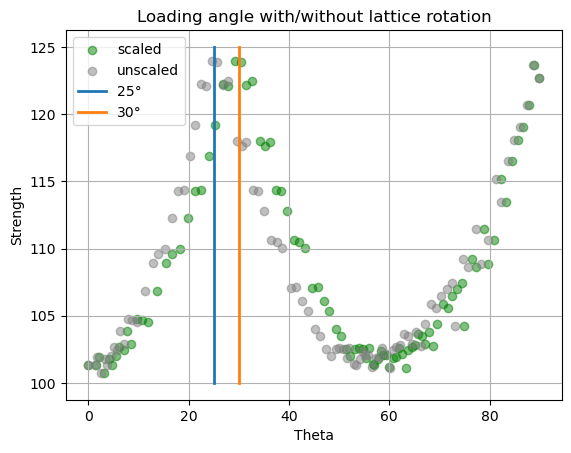

In [46]:
from filter_csv import filter_data
import local_config
import pandas as pd
import matplotlib.pyplot as plt

# ========== USER INTERFACE ==========
folder = f'{local_config.DATA_DIR}/rotation_tests'
csv_file = f"{folder}/all_simulations.csv"

exact_filters = {
    "Num Atoms x": 60,
    "Num Atoms y": 60,
    "Defects": "None",  # will match NaN or "None"
    # "Defect Percentage": 0.5,
    # "Defect Random Seed": 3,
    # "Theta Requested": 0
    # "Strain Rate x": 0.001,
    # "Strain Rate y": 0.001
}

range_filters = {
    # "Defect Percentage": (0.4, 0.6),
    # "Defect Random Seed": (0, 10)
    # "Theta Requested": (90, 90),
    # "Sigma_1": (4, 20)
}

or_filters = {
    # "Defect Type": ["SV", "DV"],
    # "Theta Requested": [0, 60]
}
# ====================================
df = pd.read_csv(csv_file)
filtered_df = filter_data(df, exact_filters=exact_filters, range_filters=range_filters, or_filters=or_filters, flip_strengths=False, shift_theta=False)

optimal_rows = []
for angle in range(0, 91, 1):
    this_df = filter_data(filtered_df, exact_filters={"Theta Requested": angle}, shift_theta=False)
    
    if this_df.empty:
        continue  # skip if no data for this angle

    this_df = this_df.copy()
    this_df["ratio"] = this_df["Strength_2"] / this_df["Strength_1"]

    # Find the row with the minimum ratio
    min_row = this_df.loc[this_df["ratio"].idxmin()]

    # Append the row to the list
    optimal_rows.append(min_row)

# Combine all optimal rows into a single DataFrame
unscaled_df = pd.DataFrame(optimal_rows)

final_df = unscaled_df.copy()
final_df["Theta"] = final_df["Theta"] - final_df["Rotation Angle"]  # apply deformation rotation fix


# plt.scatter(result["Theta Requested"], result["Strength_1"], color='blue', alpha=0.5)
plt.scatter(final_df["Theta"], final_df["Strength_1"], color='green', alpha=0.5, label="scaled")
plt.scatter(unscaled_df["Theta"], final_df["Strength_1"], color='grey', alpha=0.5, label="unscaled")
plt.plot([25, 25], [100, 125], lw=2, label="25°")
plt.plot([30, 30], [100, 125], lw=2, label="30°")

plt.xlabel("Theta")
plt.legend()
plt.ylabel("Strength")
plt.title("Loading angle with/without lattice rotation")
plt.grid()
plt.show


Here we pin the function at the peak and the valley

k0=109.380503, k1=-9.619871, k2=-0.059290, k3=2.323041, k4=0.482682


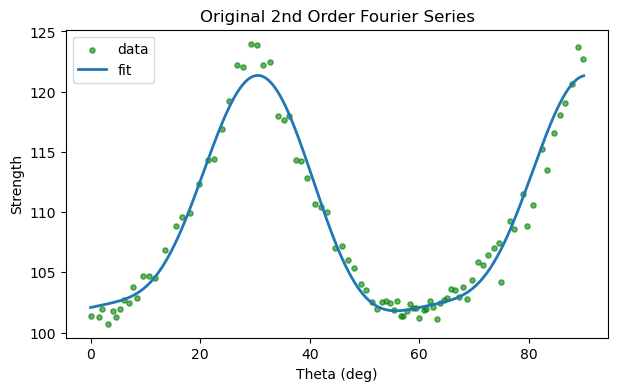

In [47]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# test data
df = final_df.copy()

theta_data = final_df["Theta"].to_numpy()
y_data = final_df["Strength_1"].to_numpy()

# define omega
def omega(theta_deg):
    return 2 * np.pi * theta_deg / 60.0

# model with constraint: k2 = 2*k4
def k_model(theta_deg, params):
    k0, k1, k2, k3, k4 = params   # t = k4
    # k2 = 2 * t
    # k4 = t
    w = omega(theta_deg)
    return (k0
            + k1 * np.cos(w)
            + k2 * np.sin(w)
            + k3 * np.cos(2 * w)
            + k4 * np.sin(2 * w))

# # Define centers for peaks and valleys
# peak_centers = np.array([30, 90, 150])
# valley_centers = np.array([0, 60, 120, 180])

# # Helper to find index of max/min near a center
# def find_nearby_index(theta_arr, y_arr, center, radius=5, mode="max"):
#     # Compute angular distance accounting for wraparound
#     dist = np.abs((theta_arr - center + 180) % 360 - 180)
#     mask = dist <= radius
#     if not np.any(mask):
#         return None
#     if mode == "max":
#         return np.argmax(y_arr[mask]) + np.where(mask)[0][0]
#     elif mode == "min":
#         return np.argmin(y_arr[mask]) + np.where(mask)[0][0]

# # Find pin indices
# pin_indices = []
# for center in peak_centers:
#     idx = find_nearby_index(theta_data, y_data, center, radius=5, mode="max")
#     if idx is not None:
#         pin_indices.append(idx)
# for center in valley_centers:
#     idx = find_nearby_index(theta_data, y_data, center, radius=5, mode="min")
#     if idx is not None:
#         pin_indices.append(idx)

# Loss function with pins

# pin_indices = [np.argmax(y_data), np.argmin(y_data)]  # peak + valley
pin_indices = []
pin_weight = 1e6

def loss(params):
    pred = k_model(theta_data, params)
    sse = np.sum((y_data - pred)**2)

    pin_penalty = 0
    for idx in pin_indices:
        pin_penalty += (k_model(theta_data[idx], params) - y_data[idx])**2

    return sse + pin_weight * pin_penalty

# def loss(params):
#     residuals = y_data - k_model(theta_data, params)
#     return np.sum(residuals**2)


# initial guess
x0 = [np.mean(y_data), 0.0, 0.0, 0.0, 0.0]

# fit using BFGS (same as your large-scale app)
result = minimize(loss, x0, method="Powell")

if result.success:
    k0, k1, k2, k3, k4 = result.x
    # k2 = 2 * t
    # k4 = t
    print(f"k0={k0:.6f}, k1={k1:.6f}, k2={k2:.6f}, k3={k3:.6f}, k4={k4:.6f}")
else:
    raise RuntimeError(f"Fit failed: {result.message}")

# plot
theta_grid = np.linspace(0, 90, 721)
plt.figure(figsize=(7,4))
plt.scatter(theta_data, y_data, s=14, alpha=0.6, label="data", c='g')
plt.plot(theta_grid, k_model(theta_grid, [k0, k1, k2, k3, k4]), label="fit", linewidth=2)
# plt.plot([25, 25], [100, 125])
# plt.plot(theta_grid, k_model(theta_grid, [110, -12.2, 0, 2.8, 0]), label="maybe", linewidth=2)

plt.title("Original 2nd Order Fourier Series")

plt.xlabel("Theta (deg)")
plt.ylabel("Strength")
plt.legend()
plt.show()


This is what we have now but up to 4th order harmonics. Does not get much better

[ 1.09380788e+02 -9.48608079e+00 -4.44485919e-02  2.38627306e+00
  3.40388909e-01 -1.04665634e+00 -3.22712416e-02  6.36843523e-01
 -1.00639573e-01]
RMSE: 0.8549929557317911


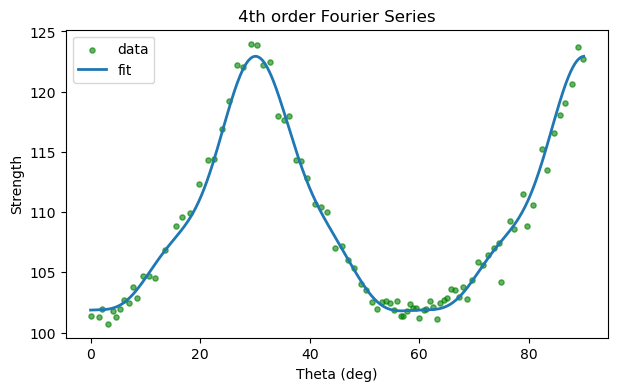

In [49]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# test data
df = final_df.copy()
theta_data = df["Theta"].to_numpy()
y_data = df["Strength_1"].to_numpy()

N = 4  # max harmonic order
x0 = np.zeros(2 * N + 1)  # initial guess


def k_model(theta_deg, params, N):
    """
    Generalized Fourier series up to order N.
    params: [k0, k1, k2, ..., k_{2N}]
        - k0: constant term
        - k_{2m-1}: cosine coefficient for m-th harmonic
        - k_{2m}: sine coefficient for m-th harmonic
    """
    w = 2 * np.pi * theta_deg / 60.0  # 60° period
    # w = 2 * np.pi * theta_deg / 180  # TO ENFORCE NO PERIODICITY
    k0 = params[0]
    total = np.full_like(theta_deg, k0, dtype=float)

    for m in range(1, N + 1):
        cos_coeff = params[2 * m - 1]
        sin_coeff = params[2 * m]
        total += cos_coeff * np.cos(m * w) + sin_coeff * np.sin(m * w)

    return total


# pin_indices = [np.argmax(y_data), np.argmin(y_data)]  # peak + valley
pin_indices = []
pin_weight = 1e6

def loss(params):
    pred = k_model(theta_data, params, N)
    sse = np.sum((y_data - pred)**2)

    pin_penalty = 0
    for idx in pin_indices:
        pin_penalty += (k_model(theta_data[idx], params, N) - y_data[idx])**2

    return sse + pin_weight * pin_penalty

# # loss = sum of squared residuals (same as in large-scale code)
# def loss(params):
#     residuals = y_data - k_model(theta_data, params, N)
#     return np.sum(residuals**2)

# fit using BFGS (same as your large-scale app) -- changed to powell
result = minimize(loss, x0, method="Powell")

if result.success:
    params_opt = result.x
    print(params_opt)
    pred = k_model(theta_data, params_opt, N)
    rmse = np.sqrt(np.mean((y_data - pred)**2))
    print("RMSE:", rmse)
else:
    raise RuntimeError(f"Fit failed: {result.message}")

# plot
theta_grid = np.linspace(0, 90, 721)
plt.figure(figsize=(7,4))
plt.scatter(theta_data, y_data, s=14, alpha=0.6, label="data", c='g')
plt.plot(theta_grid, k_model(theta_grid, params_opt, N), label="fit", linewidth=2)
plt.xlabel("Theta (deg)")
plt.ylabel("Strength")
plt.title(f"{N}th order Fourier Series")
plt.legend()
plt.show()


Spliced Quadratics:

Fit successful:
a = 23.1338, c = 101.6444
RMSE = 0.880598


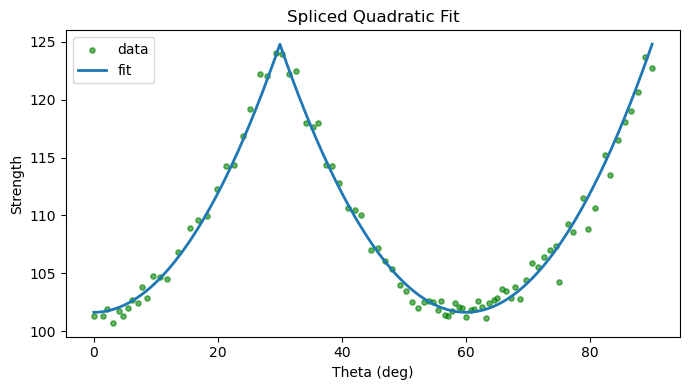

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Data
df = final_df.copy()
theta_data = df["Theta"].to_numpy()
y_data = df["Strength_1"].to_numpy()

# Restrict to [0, 90]
mask = (theta_data >= 0) & (theta_data <= 90)
theta_data = theta_data[mask]
y_data = y_data[mask]

def wrapped_distance(theta, center):
    return (theta - center + 180) % 360 - 180

def spliced_valley_quad(theta_deg, a, c):
    theta_deg = np.asarray(theta_deg)
    output = np.zeros_like(theta_deg, dtype=float)

    centers = [0, 60]

    for mu in centers:
        d = wrapped_distance(theta_deg, mu)
        mask = np.abs(d) <= 30
        output[mask] = a * (d[mask] / 30.0)**2 + c

    return output

# Loss function
def loss(params):
    a, c = params
    pred = spliced_valley_quad(theta_data, a, c)
    residuals = y_data - pred
    return np.sum(residuals**2)

# Initial guess
a0 = 1.0
c0 = np.min(y_data)
x0 = [a0, c0]

# Bounds
bounds = [(0, None),     # a > 0
          (None, None)]  # c free

# Fit
result = minimize(loss, x0, method="Powell", bounds=bounds)

if result.success:
    a, c = result.x
    rmse = np.sqrt(result.fun / y_data.size)
    print(f"Fit successful:\na = {a:.4f}, c = {c:.4f}\nRMSE = {rmse:.6g}")
else:
    raise RuntimeError("Fit failed: " + result.message)

# Plot
theta_grid = np.linspace(0, 90, 361)
fit_curve = spliced_valley_quad(theta_grid, a, c)

plt.figure(figsize=(7, 4))
plt.scatter(theta_data, y_data, s=14, alpha=0.6, label="data", c='g')
plt.plot(theta_grid, fit_curve, label="fit", linewidth=2)
plt.xlabel("Theta (deg)")
plt.ylabel("Strength")
plt.title("Spliced Quadratic Fit")
plt.legend()
plt.tight_layout()
plt.show()


In [8]:
from scipy.linalg import polar
import numpy as np


F = np.array([[1.119, 0.177, 0], [0, 1.047, 0], [0, 0, 1]])

R, U = polar(F, side='right')

print("U:\n", U)

print("\nR:\n", R)

print("\nR.T @ R:\n", R.T @ R)

print("\ndet(R):", np.linalg.det(R))

print("Angle =", np.degrees(np.arctan2(R[1, 0], R[0, 0])))

U:
 [[1.11528241 0.09113804 0.        ]
 [0.09113804 1.05793755 0.        ]
 [0.         0.         1.        ]]

R:
 [[ 0.99667776  0.08144597  0.        ]
 [-0.08144597  0.99667776  0.        ]
 [ 0.          0.          1.        ]]

R.T @ R:
 [[1.00000000e+00 3.56673573e-17 0.00000000e+00]
 [3.56673573e-17 1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

det(R): 1.0
Angle = -4.671684769432277


In [34]:
F = np.array([[1.119, 0.177, 0], [0, 1.047, 0], [0, 0, 1]])

C = F.T @ F

vals2, vecs = np.linalg.eigh(C)

print("C:\n", C)
print("\nEigenvalues squared with their eigenvectors:")

# vecs[:, 0] = vecs[:, 0] / -0.8062578
# vecs[:, 2] = vecs[:, 2] / -0.59156433

for i in range(3):
    print(vals2[i], vecs[:, i])


vals = np.sqrt(vals2)
print("\nEigenvalues:", vals)

U = np.zeros((3, 3))

for i in range(3):
    M = np.zeros((3, 3))
    for j in range(3):
        for k in range(3):
            M[j, k] = vecs[j, i] * vecs[k, i]
    print(i, '\n', M)
    U += (vals[i] * M)

u_inv = np.linalg.inv(U)
R = F @ u_inv
print("\nU:\n", U)

print("\nR:\n", R)

print("\nR.T @ R:\n", R.T @ R)

print("\ndet(R):", np.linalg.det(R))

print("Angle =", np.degrees(np.arctan2(R[1, 0], R[0, 0])))

C:
 [[1.252161 0.198063 0.      ]
 [0.198063 1.127538 0.      ]
 [0.       0.       1.      ]]

Eigenvalues squared with their eigenvectors:
0.9822159887325506 [ 0.59156433 -0.8062578   0.        ]
1.0 [0. 0. 1.]
1.3974830112674494 [-0.8062578  -0.59156433 -0.        ]

Eigenvalues: [0.9910681  1.         1.18215186]
0 
 [[ 0.34994835 -0.47695336  0.        ]
 [-0.47695336  0.65005165 -0.        ]
 [ 0.         -0.          0.        ]]
1 
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]
2 
 [[0.65005165 0.47695336 0.        ]
 [0.47695336 0.34994835 0.        ]
 [0.         0.         0.        ]]

U:
 [[1.11528241 0.09113804 0.        ]
 [0.09113804 1.05793755 0.        ]
 [0.         0.         1.        ]]

R:
 [[ 0.99667776  0.08144597  0.        ]
 [-0.08144597  0.99667776  0.        ]
 [ 0.          0.          1.        ]]

R.T @ R:
 [[ 1.00000000e+00 -4.27177951e-17  0.00000000e+00]
 [-4.27177951e-17  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]

de

Shifted Theta such that Theta[new] = Theta[old] - Rotation Angle.
The Total Loss is: 660.5554533680869


/tmp/ipykernel_1273822/2497692580.py:114: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


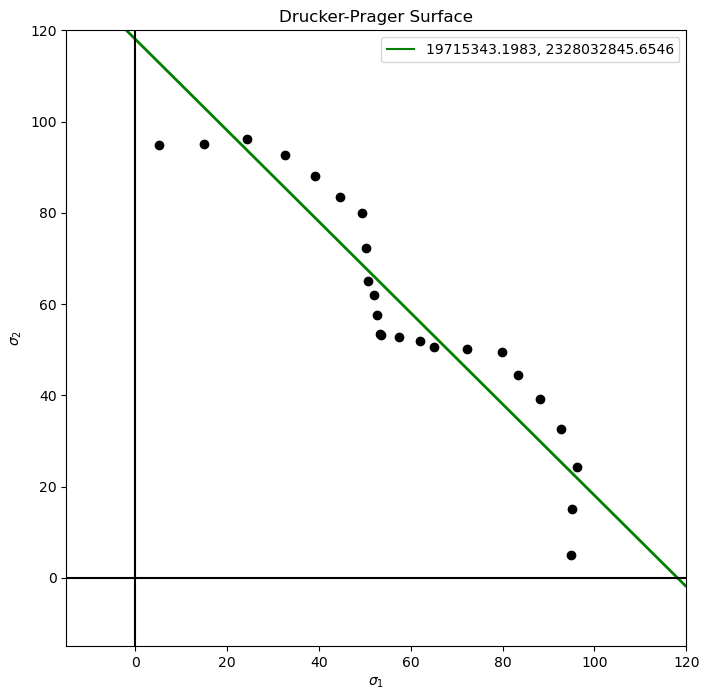

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from filter_csv import filter_data
import pandas as pd
import local_config

df = pd.read_csv(f"{local_config.DATA_DIR}/rotation_tests/all_simulations.csv")

exact_filters = {
    "Defects": "{\"DV\": 0.5}",
    "Defect Random Seed": 54,
    "Theta Requested": 90
}

filtered_df = filter_data(df, exact_filters=exact_filters, flip_strengths=True, duplic_freq=(0, 91, 10), only_uniaxial=False, remove_dupes=True)


grid = np.linspace(-10, 120, 1000)

# Create sigma1, sigma2 grid
sig1, sig2 = np.meshgrid(grid, grid)
sig3 = np.zeros_like(sig1)  

# Compute I1 and sqrt(J2)
i1 = sig1 + sig2 + sig3
mean_stress = i1 / 3
dev_xx = sig1 - mean_stress
dev_yy = sig2 - mean_stress
dev_zz = sig3 - mean_stress

j2 = 0.5 * (dev_xx**2 + dev_yy**2 + dev_zz**2)

def plot_dp(a, k, col, ax):
    F = np.sqrt(j2) + a * i1 - k
    ax.contour(sig1, sig2, F, levels=[0], colors=col, linewidths=2)
    ax.plot([], [], color=col, label=f"{a}, {k}")  # for legend 

def calculate_invariants(point):
    sigma = np.diagflat([point[0], point[1], point[2]])
    i1 = np.trace(sigma)  # tr(sigma)
    dev_stress = sigma - (1 / 3) * i1 * np.identity(3)
    dev2 = dev_stress @ dev_stress
    j2 = 0.5 * np.trace(dev2)
    return i1, j2

def dp(point, params, return_invariants=False):

    alpha = params[0]
    k = params[1]
    i1, j2 = calculate_invariants(point)

    dp = np.sqrt(j2) + alpha * i1 - k
    if return_invariants:
        return dp, i1, j2
    else:
        return dp

def dp_stress_distance(point, params, eps=1e-12):
    alpha, k = params
    s1 = float(point[0])
    s2 = float(point[1])
    s3 = float(point[2])

    F, I1, J2 = dp(point, params, return_invariants=True)
    J2 = (s1*s1 + s2*s2 + s3*s3 - s1*s2 - s2*s3 - s3*s1) / 3.0
    q = max(np.sqrt(J2), eps)  # protect against J2 = 0
    dF_dsig1 = (2.0*s1 - s2 - s3) / (6.0*q) + alpha
    dF_dsig2 = (2.0*s2 - s3 - s1) / (6.0*q) + alpha
    dF_dsig3 = (2.0*s3 - s1 - s2) / (6.0*q) + alpha
    grad_norm = np.sqrt(dF_dsig1*dF_dsig1 + dF_dsig2*dF_dsig2 + dF_dsig3*dF_dsig3)
    return F / max(grad_norm, 1e-9)  # signed normal distance

def loss(df, params, return_resid=False):
    resid = [dp_stress_distance([row["Strength_1"], row["Strength_2"], row["Strength_3"]], params) for _, row in df.iterrows()]
    return resid if return_resid else float(np.sum(np.square(resid)))
    
# alpha_test = 0.8
# k_test = 140

alpha_test = 19715343.1983
k_test = 2328032845.6546

print("The Total Loss is:", loss(filtered_df, [alpha_test, k_test]))

fig, ax = plt.subplots(figsize=(8, 8))

# plot_dp(-0.2, 30, "red", ax)
# plot_dp(-0.1, 30, "orange", ax)
# plot_dp(0.0, 30, "yellow", ax)
# plot_dp(0.1, 30, "green", ax)
# plot_dp(0.2, 30, "blue", ax)

# plot_dp(0, 20, "red", ax)
# plot_dp(0, 30, "orange", ax)
plot_dp(alpha_test, k_test, "green", ax)
# plot_dp(0, 50, "green", ax)
# plot_dp(0, 60, "blue", ax)


ax.plot([-50, 130], [0, 0], color='black')
ax.plot([0, 0], [-50, 130], color='black')

ax.scatter(filtered_df["Strength_1"], filtered_df["Strength_2"], color='k')

ax.set_xlabel(r"$\sigma_1$")
ax.set_ylabel(r"$\sigma_2$")

ax.set_xlim(-15, 120)
ax.set_ylim(-15, 120)

ax.set_title(f"Drucker-Prager Surface")
ax.legend()

fig.show()

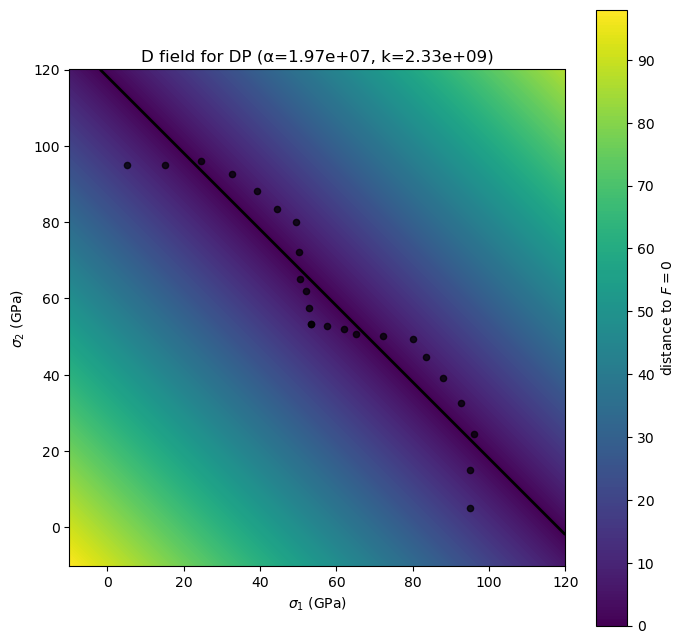

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# ----- grid in stress space -----
grid = np.linspace(-10.0, 120.0, 600)
sig1, sig2 = np.meshgrid(grid, grid)
sig3 = np.zeros_like(sig1)  # plane stress; change if needed

# ----- DP field and distance field -----
def F_field(sig1, sig2, sig3, alpha, k, eps=1e-12):
    J2 = (sig1**2 + sig2**2 + sig3**2 - sig1*sig2 - sig2*sig3 - sig3*sig1) / 3.0
    q  = np.sqrt(np.maximum(J2, eps))
    I1 = sig1 + sig2 + sig3
    return q + alpha*I1 - k

def distance_field(sig1, sig2, sig3, alpha, k, eps=1e-12):
    # DP value
    F = F_field(sig1, sig2, sig3, alpha, k, eps)
    # pieces for gradient in-plane
    J2 = (sig1**2 + sig2**2 + sig3**2 - sig1*sig2 - sig2*sig3 - sig3*sig1) / 3.0
    q  = np.sqrt(np.maximum(J2, eps))
    dF_dsig1 = (2.0*sig1 - sig2 - sig3) / (6.0*q) + alpha
    dF_dsig2 = (2.0*sig2 - sig3 - sig1) / (6.0*q) + alpha
    grad_norm = np.sqrt(dF_dsig1**2 + dF_dsig2**2)
    grad_norm = np.maximum(grad_norm, 1e-12)
    return np.abs(F) / grad_norm   # unsigned distance field

# ----- plot -----
def plot_dp_distance_field(ax, alpha, k, scatter_df=None, title=None):
    # compute fields
    D = distance_field(sig1, sig2, sig3, alpha, k)
    F = F_field(sig1, sig2, sig3, alpha, k)

    # filled contour of the distance (looks "continuous" with many levels)
    cs = ax.contourf(sig1, sig2, D, levels=200)
    cbar = ax.figure.colorbar(cs, ax=ax)
    cbar.set_label(r'distance to $F=0$')

    # overlay the DP curve
    ax.contour(sig1, sig2, F, levels=[0.0], colors='k', linewidths=2)

    # optional: scatter your MD points
    if scatter_df is not None:
        ax.scatter(scatter_df["Strength_1"], scatter_df["Strength_2"], s=20, color='k', alpha=0.75)

    # axes cosmetics
    ax.set_xlabel(r'$\sigma_1$ (GPa)')
    ax.set_ylabel(r'$\sigma_2$ (GPa)')
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(grid.min(), grid.max()); ax.set_ylim(grid.min(), grid.max())
    if title:
        ax.set_title(title)

# example use
# alpha_test = -0.36
# k_test = -3
alpha_test = 19715343.1983
k_test = 2328032845.6546


fig, ax = plt.subplots(figsize=(8,8))
plot_dp_distance_field(ax, alpha_test, k_test, scatter_df=filtered_df,
                       title=f'D field for DP (α={alpha_test:.3g}, k={k_test:.3g})')
plt.show()


### Here are some plots of the $\alpha$ and $k$ distributions in different scenarios.

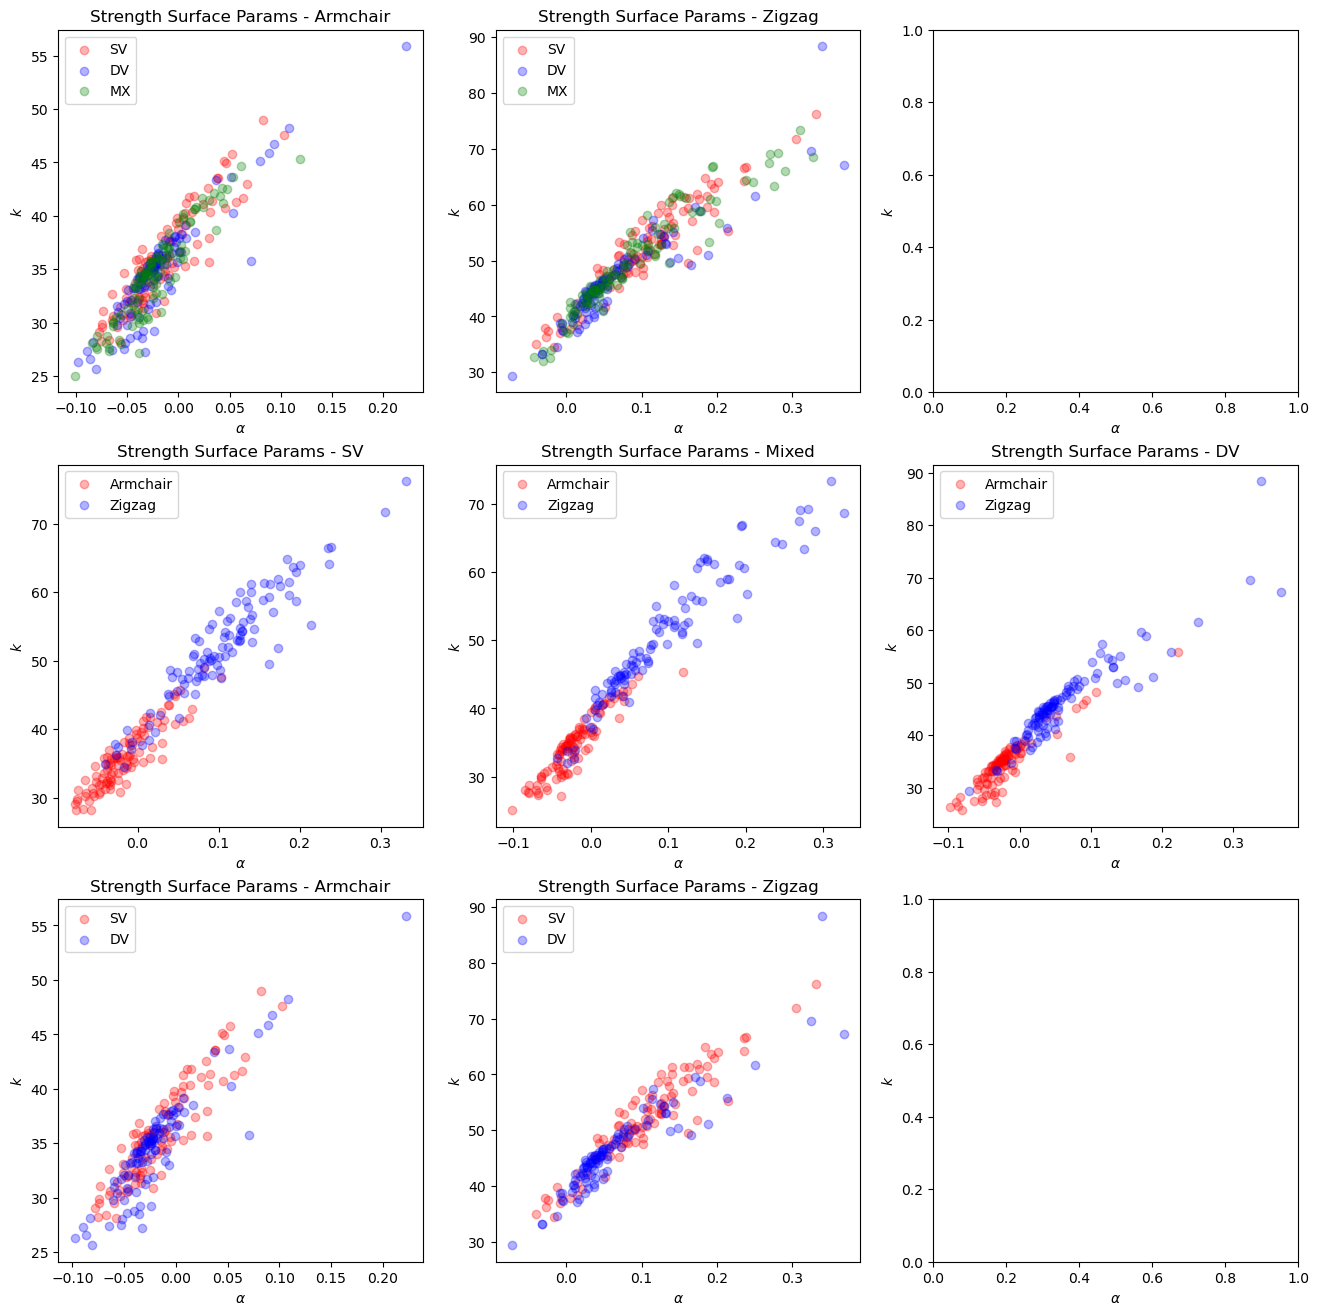

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import local_config
import numpy as np

ac_sv = pd.read_csv(f"DPparams_AC_SV.csv")
ac_dv = pd.read_csv(f"DPparams_AC_DV.csv")
ac_mx = pd.read_csv(f"DPparams_AC_MX.csv")
zz_sv = pd.read_csv(f"DPparams_ZZ_SV.csv")
zz_dv = pd.read_csv(f"DPparams_ZZ_DV.csv")
zz_mx = pd.read_csv(f"DPparams_ZZ_MX.csv")

mask = (zz_dv["k"] < 100)
zz_dv = zz_dv.loc[mask].copy()

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(16, 16))
for ax in np.ndarray.flatten(axs):
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel(r"$k$")

axs[0, 0].scatter(ac_sv["alpha"], ac_sv["k"], color='r', alpha=0.3, label='SV')
axs[0, 0].scatter(ac_dv["alpha"], ac_dv["k"], color='b', alpha=0.3, label='DV')
axs[0, 0].scatter(ac_mx["alpha"], ac_mx["k"], color='g', alpha=0.3, label='MX')
axs[0, 0].legend()
axs[0, 0].set_title("Strength Surface Params - Armchair")

axs[0, 1].scatter(zz_sv["alpha"], zz_sv["k"], color='r', alpha=0.3, label='SV')
axs[0, 1].scatter(zz_dv["alpha"], zz_dv["k"], color='b', alpha=0.3, label='DV')
axs[0, 1].scatter(zz_mx["alpha"], zz_mx["k"], color='g', alpha=0.3, label='MX')
axs[0, 1].legend()
axs[0, 1].set_title("Strength Surface Params - Zigzag")

axs[1, 0].scatter(ac_sv["alpha"], ac_sv["k"], color='r', alpha=0.3, label='Armchair')
axs[1, 0].scatter(zz_sv["alpha"], zz_sv["k"], color='b', alpha=0.3, label='Zigzag')
axs[1, 0].legend()
axs[1, 0].set_title("Strength Surface Params - SV")

axs[1, 1].scatter(ac_mx["alpha"], ac_mx["k"], color='r', alpha=0.3, label='Armchair')
axs[1, 1].scatter(zz_mx["alpha"], zz_mx["k"], color='b', alpha=0.3, label='Zigzag')
axs[1, 1].legend()
axs[1, 1].set_title("Strength Surface Params - Mixed")

axs[1, 2].scatter(ac_dv["alpha"], ac_dv["k"], color='r', alpha=0.3, label='Armchair')
axs[1, 2].scatter(zz_dv["alpha"], zz_dv["k"], color='b', alpha=0.3, label='Zigzag')
axs[1, 2].legend()
axs[1, 2].set_title("Strength Surface Params - DV")

axs[2, 0].scatter(ac_sv["alpha"], ac_sv["k"], color='r', alpha=0.3, label='SV')
axs[2, 0].scatter(ac_dv["alpha"], ac_dv["k"], color='b', alpha=0.3, label='DV')
axs[2, 0].legend()
axs[2, 0].set_title("Strength Surface Params - Armchair")

axs[2, 1].scatter(zz_sv["alpha"], zz_sv["k"], color='r', alpha=0.3, label='SV')
axs[2, 1].scatter(zz_dv["alpha"], zz_dv["k"], color='b', alpha=0.3, label='DV')
axs[2, 1].legend()
axs[2, 1].set_title("Strength Surface Params - Zigzag")

plt.show()

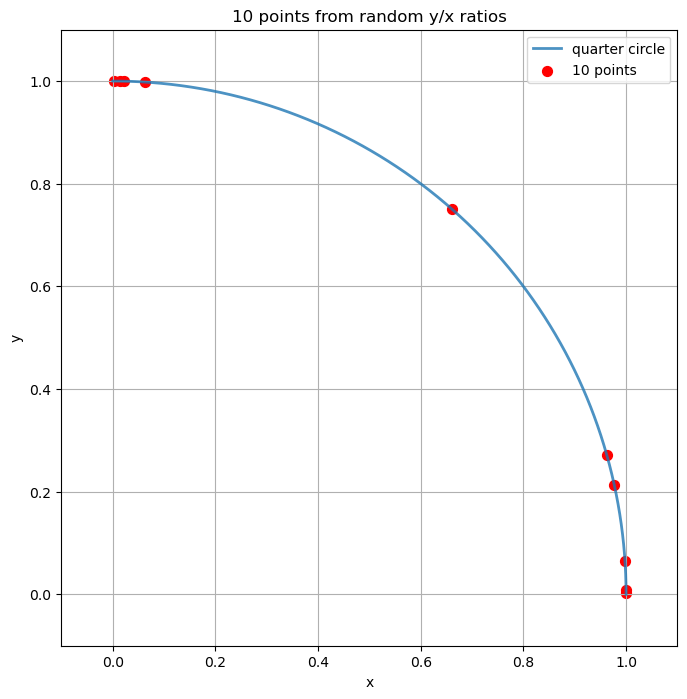

In [162]:
import numpy as np
import matplotlib.pyplot as plt

def points_from_ratios(n, radius=1.0, ratio_range=(1e-3, 1e3), seed=None):
    """
    Sample n positive ratios k = y/x, log uniform over ratio_range,
    then map them to points on x^2 + y^2 = radius^2 in the first quadrant.
    """
    rng = np.random.default_rng(seed)
    rmin, rmax = ratio_range
    logk = rng.uniform(np.log(rmin), np.log(rmax), size=n)  # log uniform
    k = np.exp(logk)

    x = radius / np.sqrt(1.0 + k**2)
    y = k * x
    return x, y, k

def points_from_uniform_angles(n, radius=1.0, seed=None):
    """
    Sample n angles uniformly on [0, pi/2], then map to the first quadrant arc.
    """
    rng = np.random.default_rng(seed)
    theta = rng.uniform(0.0, 0.5*np.pi, size=n)
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    return x, y, theta

def plot_points_and_quarter_arc(x, y, radius=1.0, title=None):
    t = np.linspace(0.0, 0.5*np.pi, 400)
    arc_x = radius * np.cos(t)
    arc_y = radius * np.sin(t)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(arc_x, arc_y, alpha=0.8, linewidth=2, label="quarter circle")
    ax.scatter(x, y, s=50, label=f"{len(x)} points", c='r')
    ax.set_aspect("equal", adjustable="box")
    ax.set_xlim(-0.1*radius, radius*1.1)
    ax.set_ylim(-0.1*radius, radius*1.1)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    if title:
        ax.set_title(title)
    ax.grid(True)
    ax.legend()
    plt.show()

# Example 1, random ratios
n = 10
x, y, k = points_from_ratios(n, radius=1.0, seed=None)
plot_points_and_quarter_arc(x, y, radius=1.0, title=f"{n} points from random y/x ratios")

# Example 2, uniform angles, better visual coverage along the arc
# x2, y2, theta = points_from_uniform_angles(n, radius=1.0, seed=None)
# plot_points_and_quarter_arc(x2, y2, radius=1.0, title=f"{n} points from uniform angles")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, fixed


# df_params = pd.read_csv("DPparams_3D_SV.csv")
df_params = pd.read_csv("test.csv")


N = 4

alphas = df_params[["a0", "a1", "a2", "a3", "a4", "a5", "a6", "a7", "a8"]].to_numpy()
ks = df_params[["k0", "k1", "k2", "k3", "k4", "k5", "k6", "k7", "k8"]].to_numpy()

def fourier_eval(params, N, theta_deg):
    """Compute Fourier series f(theta) = a0 + Σ[a_cos cos + a_sin sin]."""
    omega = 2 * np.pi * theta_deg / 60.0   # periodic over [0, 60]
    f = params[0]
    for m in range(1, N + 1):
        cos_coeff = params[2*m - 1]
        sin_coeff = params[2*m]
        f += cos_coeff * np.cos(m * omega) + sin_coeff * np.sin(m * omega)
    return f

def plot_ak_param(ax, params, current_theta):
    thetas = np.linspace(0, 90, 200)
    y = fourier_eval(params, 4, thetas)
    ax.plot(thetas, y, color='k', alpha=0.8)
    ax.plot([current_theta, current_theta], [min(y), max(y)], color='red')


def plot_dp(alpha_coeffs, k_coeffs, current_theta=0):
    current_alpha = fourier_eval(alpha_coeffs, 4, current_theta)
    current_k = fourier_eval(k_coeffs, 4, current_theta)

    F = np.sqrt(j2) + current_alpha * i1 - current_k
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

    axs[0].contour(sig1, sig2, F, levels=[0], linewidths=2, colors='blue')  # F=0 curve
    axs[0].axhline(0, color='black', linewidth=1)
    axs[0].axvline(0, color='black', linewidth=1)
    axs[0].set_xlim(-30, 100); axs[0].set_ylim(-30, 100)
    axs[0].set_xlabel(r"$\sigma_1$")
    axs[0].set_ylabel(r"$\sigma_2$")
    axs[0].set_title(f"Drucker-Prager Surface  (α={current_alpha:.2f},  k={current_k:.1f})")

    plot_ak_param(axs[1], alpha_coeffs, current_theta)
    plot_ak_param(axs[2], k_coeffs, current_theta)

    axs[1].set_xlabel("theta")
    axs[1].set_ylabel("alpha")
    axs[1].set_title(f"Alpha vs Theta")
    axs[1].grid(alpha=0.3)

    axs[2].set_xlabel("theta")
    axs[2].set_ylabel("k")
    axs[2].set_title(f"k vs Theta")
    axs[2].grid(alpha=0.3)
    plt.show(fig)


# thetas = np.linspace(0, 90, 100)
# fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
# for alpha, k in zip(alphas, ks):
#     y_a = fourier_eval(alpha, 4, thetas)
#     y_k = fourier_eval(k, 4, thetas)
#     axs[0].plot(thetas, y_a, color='k', alpha=0.2)
#     axs[1].plot(thetas, y_k, color='k', alpha=0.2)

# axs[0].set_title("Alpha")
# axs[1].set_title("K")
# plt.show()


theta_slider = FloatSlider(description='theta', min=0, max=90, step=1, value=0, readout_format='.0f')
interact(plot_dp, alpha_coeffs=fixed(alphas[0]), k_coeffs=fixed(ks[0]), current_theta=theta_slider, sig_bound=sig_slider)


interactive(children=(FloatSlider(value=0.0, description='theta', max=90.0, readout_format='.0f', step=1.0), O…

<function __main__.plot_dp(alpha_coeffs, k_coeffs, current_theta=0)>